#### **Disaster Classification** 📖

Disaster vs Non Disaster

**Purpose**: This colab is used to classify the disaster dataset whether it is disaster related or not.



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import re

In [ ]:
input_datapath  = "/content/drive/MyDrive/master thesis on NLP/Colab Notebook/Dataset/disaster_data/dataset_015_to_024_bipad/Social Media Types/datasets/classification_dataset/classification_dataset_v3.csv"

In [ ]:
df = pd.read_csv(input_datapath)
df

,Unnamed: 0,text,target
0,0,Structural poverty is the government's failure...,0
1,1,Forest Fire at Aathbiskot Municipality-\nOn Ju...,1
2,2,ðŸ”¥ Forest Fire Alert! ðŸ”¥\n\nA devastating ...,1
3,3,"Usually, the lake is a water source for helite...",0
4,4,Avalanche strikes #NeelumValley &amp; it's bee...,0
...,...,...,...
4928,4928,Dr. Besser's 3 Tips to Ride Hurricane Sandy Ou...,0
4929,4929,Good Info. PLs read.Hurricane Sandy Power Outa...,0
4930,4930,"Drinks, food, && a tornado sounds like a good ...",0
4931,4931,Thanks to @foodbankmetrodc for providing emerg...,0


##### Data Preprocessing 🔍
- Remove null values
- Remove urls
- Remove special characters
- Remove hashtags
- Remove emojis

In [ ]:
# Remove the null values from the dataset
df = df.dropna()
df = df.drop(columns = ["Unnamed: 0"])
df = df.reset_index(drop=True)
df


,text,target
0,Structural poverty is the government's failure...,0
1,Forest Fire at Aathbiskot Municipality-\nOn Ju...,1
2,ðŸ”¥ Forest Fire Alert! ðŸ”¥\n\nA devastating ...,1
3,"Usually, the lake is a water source for helite...",0
4,Avalanche strikes #NeelumValley &amp; it's bee...,0
...,...,...
4928,Dr. Besser's 3 Tips to Ride Hurricane Sandy Ou...,0
4929,Good Info. PLs read.Hurricane Sandy Power Outa...,0
4930,"Drinks, food, && a tornado sounds like a good ...",0
4931,Thanks to @foodbankmetrodc for providing emerg...,0


In [ ]:
# Check if it has null values remaining
df.isna().sum()

text      0
target    0
dtype: int64

In [ ]:
#shuffling the dataset
df = df.sample(frac=1).reset_index(drop=True)
df

,text,target
0,ðŸš¨ ALERT ðŸš¨ A devastating landslide occurr...,1
1,ðŸš¨ Urgent Alert ðŸš¨\nFloods have struck Luk...,1
2,ðŸ”´ #WAARLAND #ambulance ðŸš‘ #p2000 A2 10187...,0
3,"On June 15th, 2023, a severe flood hit Bansbot...",1
4,The antichrist - he single-handedly annihilate...,0
...,...,...
4928,ðŸŒŠ Flood Alert ðŸŒŠ\n\nðŸ“ Gauradhaha Munic...,1
4929,You crush them and you crush them without merc...,0
4930,ðŸš¨ Urgent Update ðŸš¨\n\nTitle: Landslide at...,1
4931,ðŸ”¥ Forest Fire Alert! ðŸ”¥\n\nðŸ“ Shankarpu...,1


#### **EDA Data Distribution**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

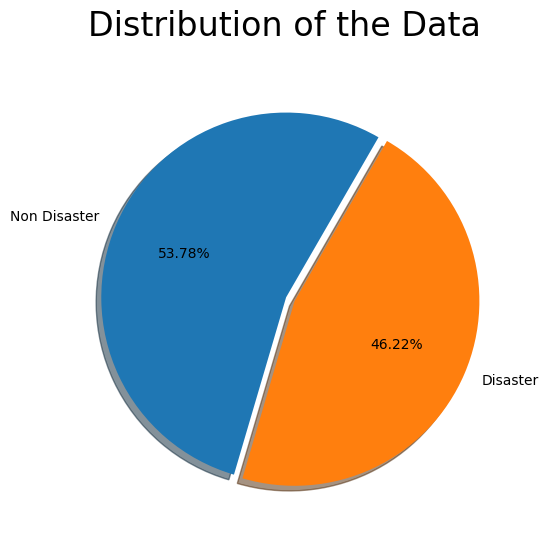

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

# Plotting the pie chart
ax.pie(df['target'].value_counts(),
       labels=['Non Disaster', 'Disaster'],
       autopct='%1.2f%%',
       shadow=True,
       explode=(0.05, 0),
       startangle=60)

# Setting the title
fig.suptitle('Distribution of the Data', fontsize=24)

# Display the plot
plt.show()


In [ ]:
#split the dataset for train and test
from sklearn.model_selection import train_test_split

train, test = train_test_split(df)               # Default split ratio 75/25, we can modify using "test_size"
train.to_csv("/content/drive/MyDrive/master thesis on NLP/Colab Notebook/Dataset/disaster_data/dataset_015_to_024_bipad/Social Media Types/datasets/classification_dataset/train.csv", index=False)
test.to_csv("/content/drive/MyDrive/master thesis on NLP/Colab Notebook/Dataset/disaster_data/dataset_015_to_024_bipad/Social Media Types/datasets/classification_dataset/test.csv", index=False)

In [ ]:
train_input = pd.read_csv("/content/drive/MyDrive/master thesis on NLP/Colab Notebook/Dataset/disaster_data/dataset_015_to_024_bipad/Social Media Types/datasets/classification_dataset/train.csv")

In [ ]:
# convert all the text into lowercase
train_input['text'] = [data.lower() for data in train_input['text']]
train_input['text'].head()

0    ðÿš¨ earthquake alert ðÿš¨ \nan earthquake wit...
1    people try and argue this... why. it's basic l...
2    ðÿš¨ urgent update ðÿš¨\n\nattention residents...
3    ðÿš¨ forest fire alert ðÿš¨\n\nðÿ”¥ a devastat...
4    check out my latest video... superzero vol. 1 ...
Name: text, dtype: object

In [ ]:
def remove_urls(text):
    pattern = re.compile(r'http\S+|www\S+')
    return pattern.sub('', text)

def remove_special_characters(text):
    pattern = re.compile(r'[^a-zA-Z0-9\s]')
    return pattern.sub('', text)

def remove_hashtags(text):
    pattern = re.compile(r'#\w+')
    return pattern.sub('', text)

def remove_emojis(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [ ]:
def preprocess_text(text):
    text = remove_urls(text)
    text = remove_special_characters(text)
    text = remove_hashtags(text)
    text = remove_emojis(text)
    return text

In [ ]:
train_input['text'] = train_input['text'].apply(preprocess_text)
train_input

,text,target
0,earthquake alert \nan earthquake with magnit...,1
1,people try and argue this why its basic logic ...,0
2,urgent update \n\nattention residents of ghor...,1
3,forest fire alert \n\n a devastating forest f...,1
4,check out my latest video superzero vol 1 clo...,0
...,...,...
3694,sour patch kids commercial were gonna drown yo...,0
3695,allahiskabir the quran wisdom giver is saying ...,0
3696,last night at 2115 a magnitude 49 earthquake r...,1
3697,yakovz,0


In [ ]:
train_input = train_input[train_input['text'].map(len) > 0]
class_counts = train_input['target'].value_counts()
print(class_counts)

0    1993
1    1706
Name: target, dtype: int64


In [ ]:
from collections import Counter

# Concatenate all the 'safe_text' into a single string
text = ' '.join(train_input['text'])

# Split the text into words
words = text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Display the most common words
print(word_counts.most_common(20))

[('the', 3267), ('and', 2379), ('in', 2091), ('a', 1772), ('to', 1646), ('of', 1431), ('stay', 1324), ('landslide', 1093), ('safe', 1038), ('province', 1026), ('are', 979), ('rural', 922), ('district', 919), ('staysafe', 900), ('flood', 837), ('affected', 837), ('with', 815), ('alert', 813), ('on', 784), ('has', 758)]


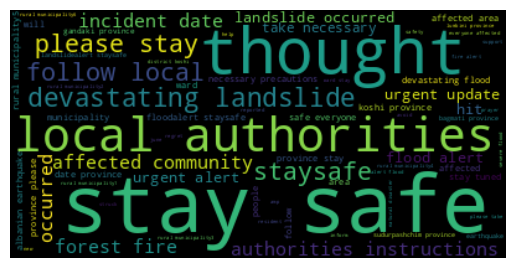

In [ ]:
from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud().generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# df["target"].replace("disaster",1, inplace=True)
# df["target"].replace("others",0, inplace=True)


##### Classification using HF Transformer 🤗
- RoBERTa
- DistilBERT

In [ ]:
# uncomment below to install transformers
!pip install transformers

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW, RobertaConfig

In [ ]:
# Split the data into training and testing sets
train_data, validation_data, train_labels, validation_labels = train_test_split(
    train_input['text'],
    train_input['target'],
    test_size=0.2,
    random_state=42
)

In [ ]:
# Load pre-trained RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Tokenize the input texts
train_encodings = tokenizer(train_data.tolist(), truncation=True, padding=True)
validation_encodings = tokenizer(validation_data.tolist(), truncation=True, padding=True)

In [ ]:
# Create custom dataset class
class TextDataset(Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, index):
        item = {key: torch.tensor(val[index]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[index])
        return item

In [ ]:
# Create training and testing datasets
train_dataset = TextDataset(train_encodings, train_labels.tolist())
validation_dataset = TextDataset(validation_encodings, validation_labels.tolist())

In [ ]:
train_input.Type = pd.Categorical(train_input.target)
train_input['labels'] = train_input.Type.codes
labels = train_input['labels'].to_numpy()
train_input.groupby('labels').count()

<ipython-input-23-b0cd2d071d4e>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train_input.Type = pd.Categorical(train_input.target)


,text,target
labels,,
0,1993,1993
1,1706,1706


In [ ]:
# Define the model configuration
model_config = RobertaConfig.from_pretrained('roberta-base', num_labels=2)
model_config.hidden_dropout_prob = 0.2  # Dropout probability'

# Create a data loader for training and validation
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=16, shuffle=False)

model = RobertaForSequenceClassification.from_pretrained('roberta-base', config=model_config)

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
optimizer = AdamW(model.parameters(), lr=1e-5)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

Epoch: 1
Train Loss: 0.1848 | Validation Loss: 0.0703
Train Accuracy: 92.84% | Validation Accuracy: 97.30%
Train F1-score: 0.9186 | Validation F1-score: 0.9710
Epoch: 2
Train Loss: 0.0571 | Validation Loss: 0.1047
Train Accuracy: 98.21% | Validation Accuracy: 95.14%
Train F1-score: 0.9803 | Validation F1-score: 0.9503
Epoch: 3
Train Loss: 0.0417 | Validation Loss: 0.0984
Train Accuracy: 98.65% | Validation Accuracy: 96.08%
Train F1-score: 0.9852 | Validation F1-score: 0.9594
Epoch: 4
Train Loss: 0.0336 | Validation Loss: 0.0720
Train Accuracy: 98.95% | Validation Accuracy: 97.30%
Train F1-score: 0.9885 | Validation F1-score: 0.9716
Epoch: 5
Train Loss: 0.0273 | Validation Loss: 0.0674
Train Accuracy: 99.36% | Validation Accuracy: 98.11%
Train F1-score: 0.9930 | Validation F1-score: 0.9799
Epoch: 6
Train Loss: 0.0146 | Validation Loss: 0.0880
Train Accuracy: 99.56% | Validation Accuracy: 97.70%
Train F1-score: 0.9952 | Validation F1-score: 0.9759
Epoch: 7
Train Loss: 0.0152 | Validation

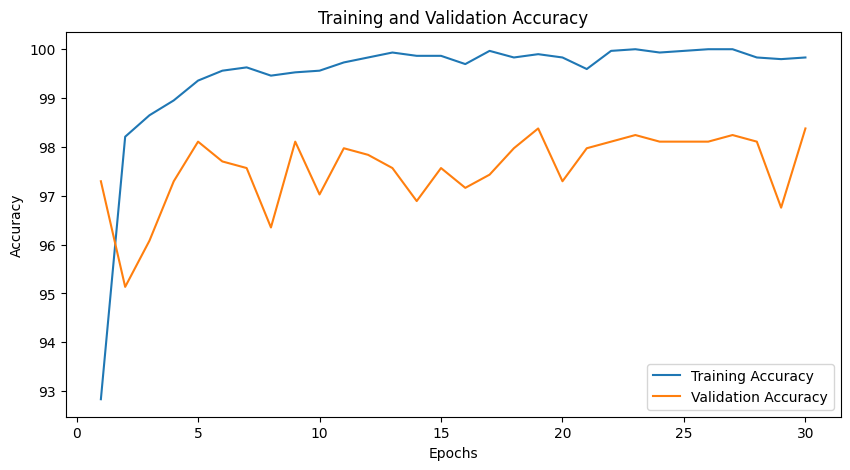

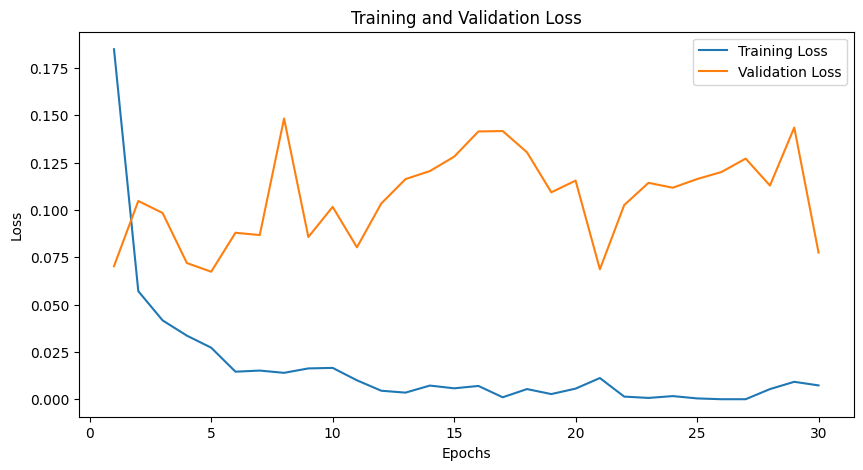

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

num_epochs = 30 # Define the number of epochs
# Lists to store metrics
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    predictions = []
    true_labels = []

    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        train_loss += loss.item()
        loss.backward()
        optimizer.step()

        _, predicted_labels = torch.max(outputs.logits, 1)
        train_total += labels.size(0)
        train_correct += (predicted_labels == labels).sum().item()

        predictions.extend(predicted_labels.tolist())
        true_labels.extend(labels.tolist())

    train_loss = train_loss / len(train_loader)
    train_accuracy = 100.0 * train_correct / train_total
    train_f1 = f1_score(true_labels, predictions)

    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    val_predictions = []
    val_true_labels = []

    with torch.no_grad():
        for batch in validation_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()

            _, predicted_labels = torch.max(outputs.logits, 1)
            val_total += labels.size(0)
            val_correct += (predicted_labels == labels).sum().item()

            val_predictions.extend(predicted_labels.tolist())
            val_true_labels.extend(labels.tolist())

    val_loss = val_loss / len(validation_loader)
    val_accuracy = 100.0 * val_correct / val_total
    val_f1 = f1_score(val_true_labels, val_predictions)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch: {epoch + 1}")
    print(f"Train Loss: {train_loss:.4f} | Validation Loss: {val_loss:.4f}")
    print(f"Train Accuracy: {train_accuracy:.2f}% | Validation Accuracy: {val_accuracy:.2f}%")
    print(f"Train F1-score: {train_f1:.4f} | Validation F1-score: {val_f1:.4f}")

# Plot for accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot for loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Save the model and tokenizer
model.save_pretrained("/content/drive/MyDrive/master thesis on NLP/Colab Notebook/Dataset/disaster_data/dataset_015_to_024_bipad/Social Media Types/datasets/results/classfication_roberta_v3.h5")
tokenizer.save_pretrained("/content/drive/MyDrive/master thesis on NLP/Colab Notebook/Dataset/disaster_data/dataset_015_to_024_bipad/Social Media Types/datasets/results/classfication_roberta_v3.tokenizer")

('/content/drive/MyDrive/master thesis on NLP/Colab Notebook/Dataset/disaster_data/dataset_015_to_024_bipad/Social Media Types/datasets/results/classfication_roberta_v3.tokenizer/tokenizer_config.json',
 '/content/drive/MyDrive/master thesis on NLP/Colab Notebook/Dataset/disaster_data/dataset_015_to_024_bipad/Social Media Types/datasets/results/classfication_roberta_v3.tokenizer/special_tokens_map.json',
 '/content/drive/MyDrive/master thesis on NLP/Colab Notebook/Dataset/disaster_data/dataset_015_to_024_bipad/Social Media Types/datasets/results/classfication_roberta_v3.tokenizer/vocab.json',
 '/content/drive/MyDrive/master thesis on NLP/Colab Notebook/Dataset/disaster_data/dataset_015_to_024_bipad/Social Media Types/datasets/results/classfication_roberta_v3.tokenizer/merges.txt',
 '/content/drive/MyDrive/master thesis on NLP/Colab Notebook/Dataset/disaster_data/dataset_015_to_024_bipad/Social Media Types/datasets/results/classfication_roberta_v3.tokenizer/added_tokens.json')

In [ ]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer

# Load the saved model and tokenizer
model = RobertaForSequenceClassification.from_pretrained("/content/drive/MyDrive/master thesis on NLP/Colab Notebook/Dataset/disaster_data/dataset_015_to_024_bipad/Social Media Types/datasets/results/classfication_roberta_v3.h5")
tokenizer = RobertaTokenizer.from_pretrained("/content/drive/MyDrive/master thesis on NLP/Colab Notebook/Dataset/disaster_data/dataset_015_to_024_bipad/Social Media Types/datasets/results/classfication_roberta_v3.tokenizer")


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/master thesis on NLP/Colab Notebook/Dataset/disaster_data/dataset_015_to_024_bipad/Social Media Types/datasets/classification_dataset/test.csv')
test_data = test_data.sample(frac=1).reset_index(drop=True)
test_data

,text,target
0,"On July 14, 2023, a severe flood devastated Jh...",1
1,ðŸŒŠðŸš§ Flood Alert ðŸš§ðŸŒŠ\n\nðŸ“ Belbari ...,1
2,RIP Nola bc that place is gonna be a drunken w...,0
3,"On July 1, 2023 a deadly landslide occurred in...",1
4,Next time on #Casualty! Tune in Saturday 21.20...,0
...,...,...
1229,TUESDAY HEADLINES.....STORMONT POWER BACK ON.....,0
1230,ðŸš¨ Urgent Update ðŸš¨\n\nðŸ’” Heartbreaking ...,1
1231,#127LivesLost I need to speak to the President...,0
1232,The forest fire inspector in the conservatory.,0


In [ ]:
# Evaluate on the test set
# test_data = pd.read_csv('/content/drive/MyDrive/master thesis on NLP/Colab Notebook/Dataset/testing_dataset_2000.csv')
test_data['text'] = test_data['text'].apply(preprocess_text)
test_encodings = tokenizer(test_data['text'].tolist(), truncation=True, padding=True)
test_dataset = TextDataset(test_encodings, test_data['target'].tolist())
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.eval()
test_predictions = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1).tolist()
        test_predictions.extend(predictions)

test_data['predicted_target'] = test_predictions
test_data[['text', 'predicted_target']].to_csv('test_disaster_predictions.csv', index=False)

Test Accuracy: 98.30%
Test F1-score: 0.9816


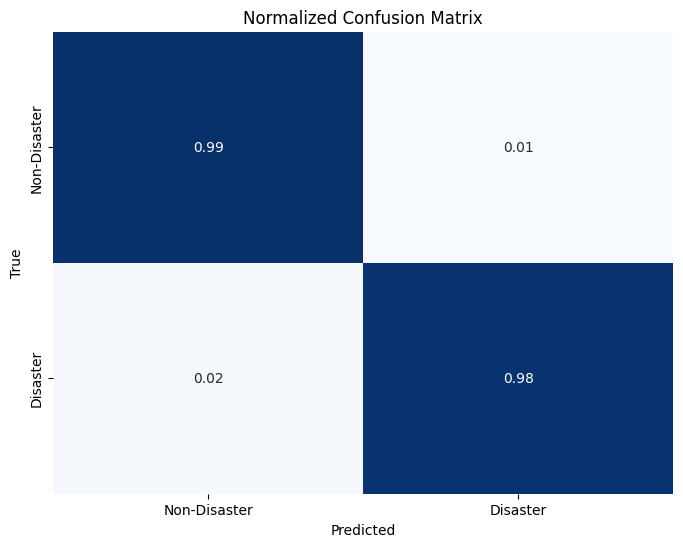

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
test_true_labels = test_data['target'].tolist()
test_predicted_labels = test_data['predicted_target'].tolist()

# Calculate F1-score and accuracy
test_f1 = f1_score(test_true_labels, test_predicted_labels)
test_accuracy = accuracy_score(test_true_labels, test_predicted_labels) * 100

print(f"Test Accuracy: {test_accuracy:.2f}%")
print(f"Test F1-score: {test_f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(test_true_labels, test_predicted_labels)
classes = ['Non-Disaster', 'Disaster']

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(test_true_labels, test_predicted_labels, target_names=classes)
print(report)

              precision    recall  f1-score   support

Non-Disaster       0.98      0.99      0.98       660
    Disaster       0.99      0.98      0.98       574

    accuracy                           0.98      1234
   macro avg       0.98      0.98      0.98      1234
weighted avg       0.98      0.98      0.98      1234



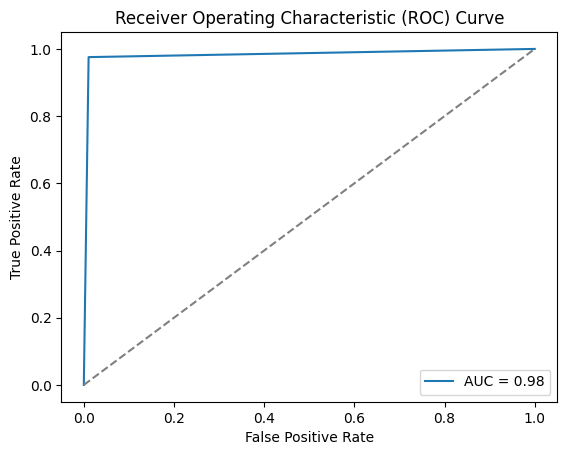

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_true_labels, test_predicted_labels)

# Calculate AUC
auc = roc_auc_score(test_true_labels, test_predicted_labels)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
# Define a list of input texts
input_texts = [
    "Monsoon-induced natural disaster: Three dead, 29 missing in the eastern Nepal",
    "Lord Jesus, your love brings freedom and pardon. Fill me with your Holy Spirit and set my heart ablaze with your l… https://t.co/VlTznnPNi8",
    "Juwan Johnson/Oregon is one big dude. Looks like a tight end stuck in the receiver group by accident.",
    "A huge Landslide occured at Bajura district ward 04. According to the local police, a family was harmed due to landslide ",
    "Kumera yellow Aftershock #PH19FOSSIL featured in bankbtn Good Living magazine Photography Stylist shino… https://t.co/V9LJ65ttzR",
    "heavy monsoon cause flood at ranibari",
    "Your handwriting seems to be disaster",
    "natural disaster: 100 people died in sindhuli due to wild fire",
    "A huge forestfire at dhorpatan ward number 6, at 2022/08/25. People should not be there. ",
    "A heavy rainfall in Koshi Province cause a huge flood in Koshi river on friday night. The local government has instructed the locals to move to safe region",
    "Hello from Bajura Nepal, A huge landslide occurs at dopche municipality. Be careful while driving!",
    "earthquake! stay safe folks"
    ]

expected = [
    "Disaster", "Not Disaster", "Not Disaster", "Disaster", "Not Disaster", "Disaster", "Not Disaster", "Disaster","Disaster","Disaster","Disaster", "Disaster"
]

# Preprocess the input texts
preprocessed_texts = [preprocess_text(text) for text in input_texts]
input_encodings = tokenizer(preprocessed_texts, truncation=True, padding=True)
input_dataset = TextDataset(input_encodings, None)
input_loader = DataLoader(input_dataset, batch_size=1, shuffle=False)

model = model.to(device)
model.eval()

with torch.no_grad():
    for i, batch in enumerate(input_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1).tolist()
        prediction = 'Disaster' if predictions[0] == 1 else 'Not Disaster'
        print(f"Input: {input_texts[i]}")
        print(f"Target: {expected[i]}")
        print(f"Prediction: {prediction}")
        print()

Input: Monsoon-induced natural disaster: Three dead, 29 missing in the eastern Nepal
Target: Disaster
Prediction: Disaster

Input: Lord Jesus, your love brings freedom and pardon. Fill me with your Holy Spirit and set my heart ablaze with your l… https://t.co/VlTznnPNi8
Target: Not Disaster
Prediction: Not Disaster

Input: Juwan Johnson/Oregon is one big dude. Looks like a tight end stuck in the receiver group by accident.
Target: Not Disaster
Prediction: Not Disaster

Input: A huge Landslide occured at Bajura district ward 04. According to the local police, a family was harmed due to landslide 
Target: Disaster
Prediction: Disaster

Input: Kumera yellow Aftershock #PH19FOSSIL featured in bankbtn Good Living magazine Photography Stylist shino… https://t.co/V9LJ65ttzR
Target: Not Disaster
Prediction: Not Disaster

Input: heavy monsoon cause flood at ranibari
Target: Disaster
Prediction: Disaster

Input: Your handwriting seems to be disaster
Target: Not Disaster
Prediction: Not Disaster
